In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('https://raw.githubusercontent.com/training-ml/Files/main/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.shape

(768, 9)

In [4]:
# dataset has 768 rows and 9 columns

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
# No missing data present in the dataset

In [8]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


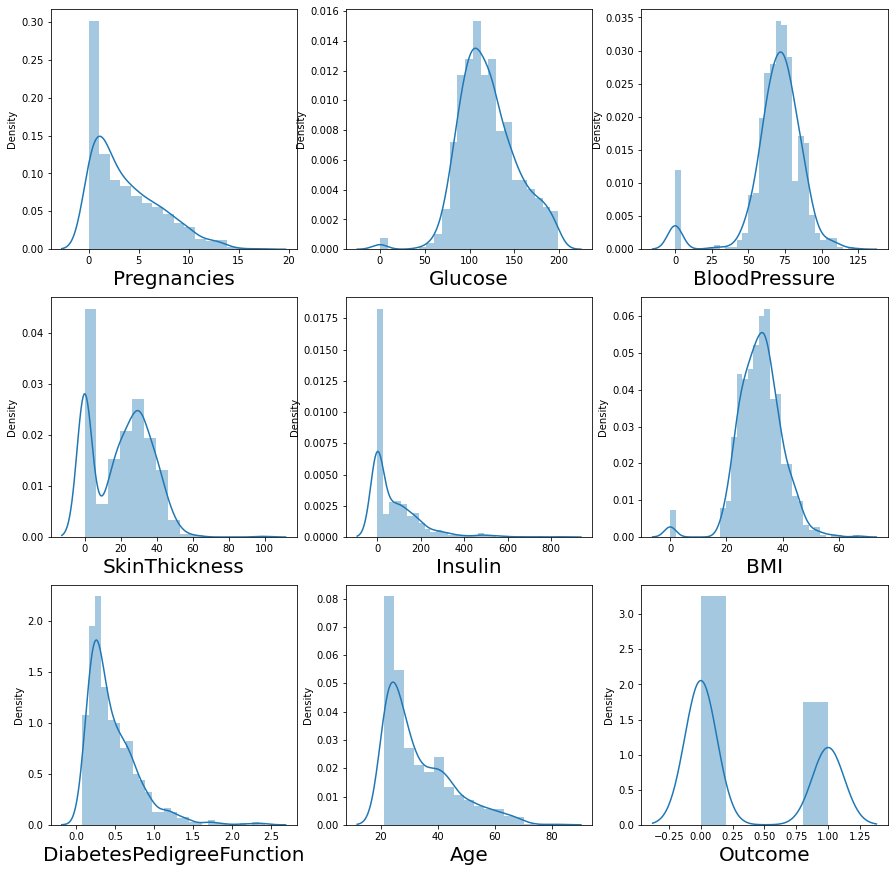

In [11]:
plt.figure(figsize=(15,15))
plotnumber=1

for column in data:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize=20)
        
    plotnumber+=1
plt.show()

In [12]:
# There are lots of outliers present in the dataset.
# Also there are lots of zero present in the dataset

In [13]:
# First we will replace the zero

In [14]:
data['Glucose']=data['Glucose'].replace(0,data['Glucose'].mean())
data['BloodPressure']=data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['SkinThickness']=data['SkinThickness'].replace(0,data['SkinThickness'].mean())
data['Insulin']=data['Insulin'].replace(0,data['Insulin'].mean())
data['BMI']=data['BMI'].replace(0,data['BMI'].mean())

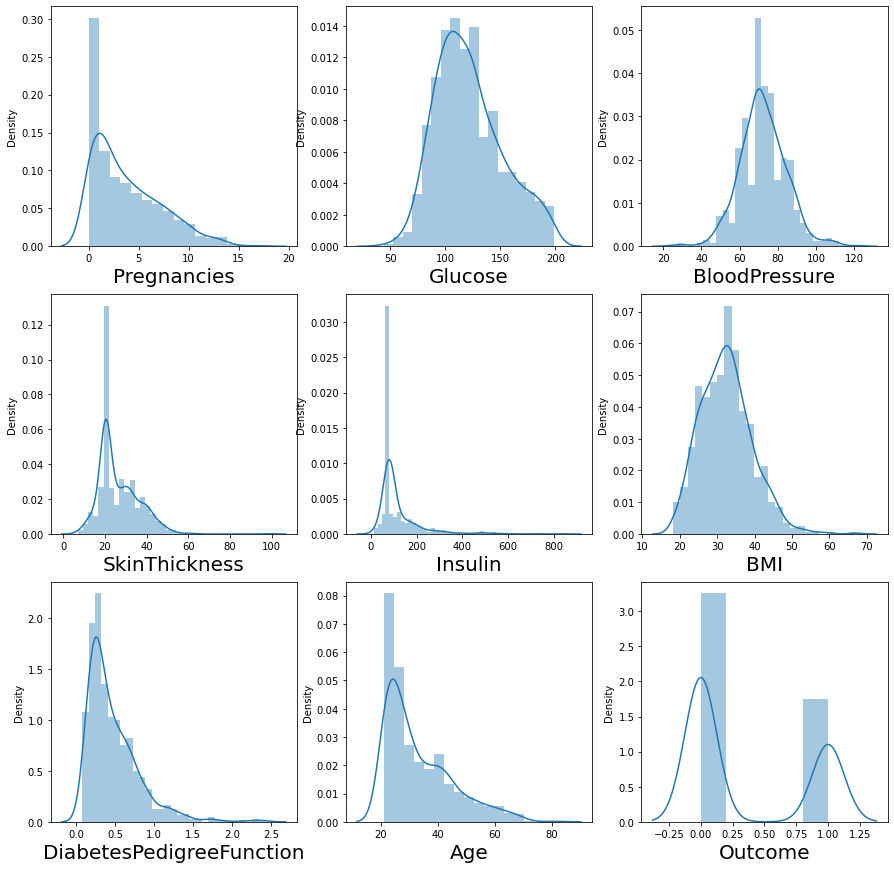

In [15]:
plt.figure(figsize=(15,15))
plotnumber=1

for column in data:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize=20)
        
    plotnumber+=1
plt.show()

In [16]:
# After replace datset look little good but outliers are still present in the dataset

In [17]:
# Now we check the outliers and we will deal with them

In [18]:
# first we will diffrencate our feature and label

In [19]:
x=data.drop(columns=['Outcome'])
y=data['Outcome']

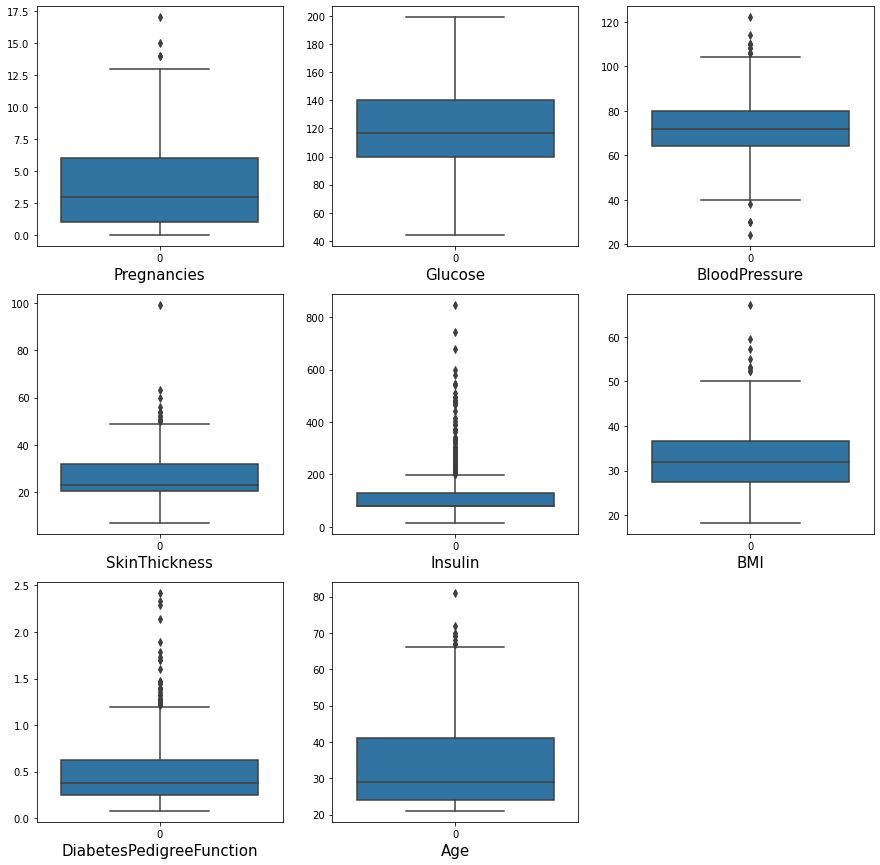

In [20]:
plt.figure(figsize=(15,15))
graph=1


for column in x:
    
    if graph<=9:
        ax=plt.subplot(3,3,graph)
        sns.boxplot(data=x[column])
        plt.xlabel(column, fontsize=15)
    graph+=1
    
plt.show()
    
    

In [21]:
# So there is lots of outliers present in the datset

In [22]:
data.shape

(768, 9)

In [23]:
q1=data.quantile(0.25)
q3=data.quantile(0.75)

iqr=q3-q1

In [24]:
iqr

Pregnancies                  5.000000
Glucose                     40.500000
BloodPressure               16.000000
SkinThickness               11.463542
Insulin                     47.450521
BMI                          9.100000
DiabetesPedigreeFunction     0.382500
Age                         17.000000
Outcome                      1.000000
dtype: float64

In [25]:
preg_high=(q3.Pregnancies+(1.5*iqr.Pregnancies))
preg_high

13.5

In [26]:
index=np.where(data['Pregnancies']> preg_high)
index

(array([ 88, 159, 298, 455], dtype=int64),)

In [27]:
data.iloc[index]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
88,15,136.0,70.0,32.0,110.000000,37.1,0.153,43,1
159,17,163.0,72.0,41.0,114.000000,40.9,0.817,47,1
298,14,100.0,78.0,25.0,184.000000,36.6,0.412,46,1
455,14,175.0,62.0,30.0,79.799479,33.6,0.212,38,1


In [28]:
data=data.drop(data.index[index])
data.shape

(764, 9)

In [29]:
high_bp=(q3.BloodPressure+(1.5*iqr.BloodPressure))
index=np.where(data['BloodPressure']>high_bp)
data.iloc[index]
data=data.drop(data.index[index])


In [30]:
data.shape

(754, 9)

In [31]:
low_bp=(q1.BloodPressure-(1.5*iqr.BloodPressure))
index=np.where(data['BloodPressure']< low_bp)
data.loc[index]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
18,1,103.0,30.000000,38.000000,83.000000,43.3,0.183,33,0
121,6,111.0,64.000000,39.000000,79.799479,34.2,0.260,24,0
587,6,103.0,66.000000,20.536458,79.799479,24.3,0.249,29,0
589,0,73.0,69.105469,20.536458,79.799479,21.1,0.342,25,0


In [32]:
data=data.drop(data.index[index])

In [33]:
data.shape

(750, 9)

In [34]:
data.reset_index()
data.shape

(750, 9)

In [35]:
high_skinthick=(q3.SkinThickness+(1.5*iqr.SkinThickness))
index=np.where(data['SkinThickness']>high_skinthick)
data.iloc[index]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
57,0,100.0,88.0,60.0,110.000000,46.8,0.962,31,0
86,13,106.0,72.0,54.0,79.799479,36.6,0.178,45,0
99,1,122.0,90.0,51.0,220.000000,49.7,0.325,31,1
120,0,162.0,76.0,56.0,100.000000,53.2,0.759,25,1
150,1,136.0,74.0,50.0,204.000000,37.4,0.399,24,0
211,0,147.0,85.0,54.0,79.799479,42.8,0.375,24,0
273,1,71.0,78.0,50.0,45.000000,33.2,0.422,21,0
275,2,100.0,70.0,52.0,57.000000,40.5,0.677,25,0
445,0,180.0,78.0,63.0,14.000000,59.4,2.420,25,1
532,1,86.0,66.0,52.0,65.000000,41.3,0.917,29,0


In [36]:
data=data.drop(data.index[index])

In [37]:
data.reset_index()
data.shape

(738, 9)

In [38]:
high_insulin=(q3.Insulin+(1.5*iqr.Insulin))
index=np.where(data['Insulin']>high_insulin)
data.iloc[index]
data=data.drop(data.index[index])

In [39]:
data.reset_index()
data.shape

(653, 9)

In [40]:
high_bmi=(q3.BMI+(1.5*iqr.BMI))
index=np.where(data['BMI']>high_bmi)
data.iloc[index]
data=data.drop(data.index[index])

In [41]:
data.reset_index()
data.shape

(651, 9)

In [42]:
high_dpf=(q3.DiabetesPedigreeFunction+(1.5*iqr.DiabetesPedigreeFunction))
index=np.where(data['DiabetesPedigreeFunction']> high_dpf)
data.iloc[index]
data=data.drop(data.index[index])

In [43]:
data.reset_index()
data.shape

(628, 9)

In [44]:
data.shape

(628, 9)

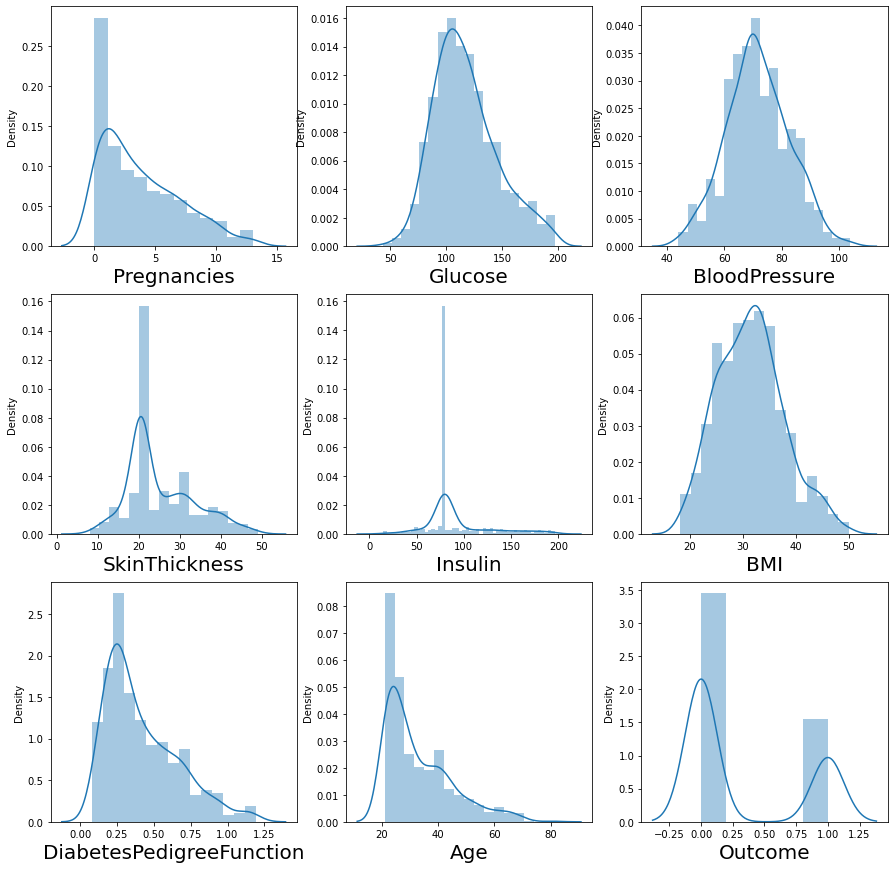

In [45]:
plt.figure(figsize=(15,15))
plotnumber=1


for column in data:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize=20)
    plotnumber+=1
    
plt.show()

In [46]:
x=data.drop(columns=['Outcome'])
y=data['Outcome']

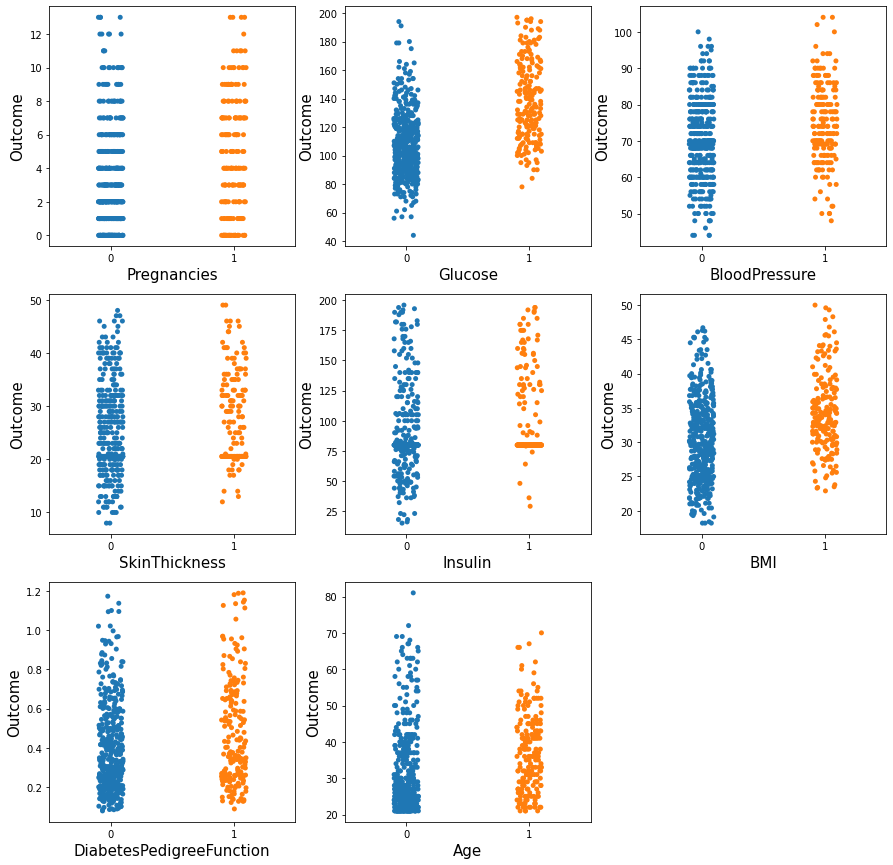

In [49]:
plt.figure(figsize=(15,15))
plotnumber=1


for column in x:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.stripplot(y,x[column])
        plt.xlabel(column, fontsize=15)
        plt.ylabel('Outcome', fontsize=15)
        
    plotnumber+=1
    
plt.show()

In [52]:
corr=data.corr()
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.151122,0.215621,0.077815,-0.004802,0.060686,0.014706,0.524808,0.203078
Glucose,0.151122,1.000000,0.242573,0.042912,0.284083,0.169123,0.056032,0.287333,0.488674
BloodPressure,0.215621,0.242573,1.000000,0.108544,-0.017799,0.260365,0.017451,0.350351,0.181114
SkinThickness,0.077815,0.042912,0.108544,1.000000,0.240623,0.494935,0.091667,0.018599,0.119688
Insulin,-0.004802,0.284083,-0.017799,0.240623,1.000000,0.141048,0.159824,0.040598,0.160526
BMI,0.060686,0.169123,0.260365,0.494935,0.141048,1.000000,0.113566,0.042800,0.291453
DiabetesPedigreeFunction,0.014706,0.056032,0.017451,0.091667,0.159824,0.113566,1.000000,0.042541,0.169530
Age,0.524808,0.287333,0.350351,0.018599,0.040598,0.042800,0.042541,1.000000,0.220142
Outcome,0.203078,0.488674,0.181114,0.119688,0.160526,0.291453,0.169530,0.220142,1.000000


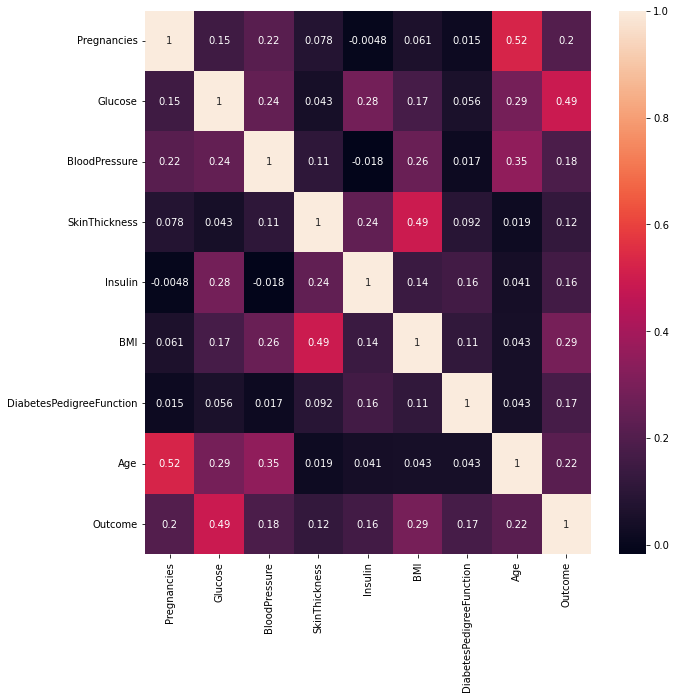

In [54]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)
plt.show()

In [55]:
x=data.drop(columns=['Outcome'])
y=data['Outcome']

In [56]:
from sklearn.linear_model import LogisticRegression

In [57]:
LR=LogisticRegression()

In [58]:
from sklearn.preprocessing import StandardScaler

In [60]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [61]:
from sklearn.model_selection import train_test_split

In [63]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.30, random_state=42)

In [65]:
LR.fit(x_train,y_train)

LogisticRegression()

In [67]:
y_pred=LR.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

In [68]:
from sklearn.metrics import accuracy_score, classification_report

In [69]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.8148148148148148

In [70]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87       130
           1       0.79      0.56      0.65        59

    accuracy                           0.81       189
   macro avg       0.80      0.75      0.76       189
weighted avg       0.81      0.81      0.80       189

